# 초보자를 위한 빠른 시작

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 501kB 49.6MB/s 
     |████████████████████████████████| 4.3MB 47.5MB/s 


# 9주차 데이터 학습 모델 설계

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# import 
import os
import pandas as pd 
import glob

In [3]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks/') # DataPath 설정 
current_path = os.getcwd() # 현재 폴더 위치 
train_path = current_path+ '/capstone_data/train' # 데이터 패스 설정 
print(train_path)

/content/gdrive/My Drive/Colab Notebooks/capstone_data/train


In [4]:
df = pd.read_json('./capstone_data/data_version_2.json')

In [ ]:
df

,tags,id,plylst_title,songs,like_cnt,updt_date,len,tag_len,songs2,song2_len
1,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,28,2,"[83116, 276692, 166267, 354465, 256598, 666852...",25
2,"[운동, 드라이브, Pop, 트로피컬하우스, 힐링, 기분전환, 2017, 팝, 트렌...",69252,2017 Pop Trend,"[418694, 222305, 96545, 135950, 304687, 457451...",435,2017-09-15 15:59:26.000,30,10,"[418694, 222305, 96545, 135950, 304687, 457451...",22
3,"[잔잔한, 추억, 회상]",36557,멍청이.. 내맘도 몰라.,"[496913, 632529, 501426, 515574, 411161, 10341...",5,2008-09-23 22:32:02.000,20,3,"[632529, 501426, 515574, 411161, 103411, 17813...",17
5,"[우울, 힐링, 힘내]",112060,지친 너를 위로해줄 제목편지 준비해봤어,"[449808, 691770, 640657, 313395, 697100, 34090...",1,2018-01-04 22:49:29.000,21,3,"[691770, 640657, 313395, 697100, 340905, 22169...",15
6,[비오는날],75342,"이렇게 비 내리는 날이면, 너도 내 생각 할까..","[379674, 164522, 33196, 281228, 640012, 117969...",17,2016-10-12 16:22:17.000,18,1,"[164522, 33196, 640012, 117969, 75425, 627363,...",15
...,...,...,...,...,...,...,...,...,...,...
45430,"[겨울, 설렘, 사랑]",133185,첫눈처럼 설레였던 그날♥,"[334564, 221618, 504089, 321512, 476845, 11368...",154,2014-12-24 14:25:23.000,25,3,"[334564, 221618, 476845, 113687, 211159, 51275...",21
45434,[팝],33486,들을수록 걸크러쉬 물씬 느껴지는 음악리스트,"[619719, 374517, 323561, 79157, 170970, 241952...",4,2017-03-18 00:07:08.000,29,1,"[619719, 374517, 323561, 79157, 241952, 587512...",17
45435,[인디],153220,오후의 어쿠스틱 vol.2,"[627005, 253230, 643932, 22659, 316149, 247137...",39,2013-04-19 01:36:45.000,21,1,"[627005, 253230, 643932, 22659, 316149, 247137...",20
45436,[여친],79538,여자친구 명곡,"[65053, 389127, 443914, 498028, 375431, 312296...",6,2018-03-09 14:24:37.000,23,1,"[65053, 389127, 443914, 498028, 375431, 312296...",23


In [ ]:
df.shape

(29354, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29354 entries, 1 to 45437
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          29354 non-null  object
 1   id            29354 non-null  int64 
 2   plylst_title  29354 non-null  object
 3   songs         29354 non-null  object
 4   like_cnt      29354 non-null  int64 
 5   updt_date     29354 non-null  object
 6   len           29354 non-null  int64 
 7   tag_len       29354 non-null  int64 
 8   songs2        29354 non-null  object
 9   song2_len     29354 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


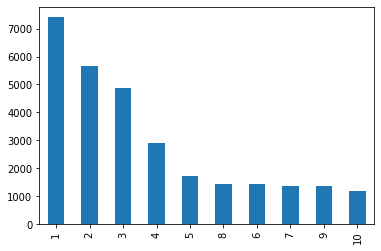

In [ ]:
df.tags.map(lambda x: len(x)).value_counts().plot.bar()

In [ ]:
df['songs2'].unique

<bound method Series.unique of 1        [83116, 276692, 166267, 354465, 256598, 666852...
2        [418694, 222305, 96545, 135950, 304687, 457451...
3        [632529, 501426, 515574, 411161, 103411, 17813...
5        [691770, 640657, 313395, 697100, 340905, 22169...
6        [164522, 33196, 640012, 117969, 75425, 627363,...
                               ...                        
45430    [334564, 221618, 476845, 113687, 211159, 51275...
45434    [619719, 374517, 323561, 79157, 241952, 587512...
45435    [627005, 253230, 643932, 22659, 316149, 247137...
45436    [65053, 389127, 443914, 498028, 375431, 312296...
45437    [287003, 408232, 625933, 543298, 222713, 10445...
Name: songs2, Length: 29354, dtype: object>

In [ ]:
# 태그 개수 세기

tag_cnt=set()
for i in df['tags']:
    for j in i:
        tag_cnt.add(j)

In [ ]:
type(tag_cnt)

set

In [ ]:
tag_cnt # 전체 태그

In [ ]:
len(tag_cnt) # 전체 태그 개수

1382

In [ ]:
# 음원 개수 세기

song_cnt=set()
for i in df['songs2']:
    for j in i:
        song_cnt.add(j)

In [ ]:
song_cnt

In [ ]:
len(song_cnt)

69888

# Latent Factor CF

In [ ]:
# [Tag x Song] Pivot Table 생성

In [ ]:
unique_tags = list(set([tag for tags in df.tags for tag in tags]))
unique_songs = list(set([song for songs in df.songs2 for song in songs]))

In [ ]:
df_pivot = pd.DataFrame(index=unique_tags, columns=unique_songs)

In [ ]:
df_pivot = df_pivot.fillna(0)

In [ ]:
for i, (tags, songs) in enumerate(zip(df.tags, df.songs2)):
    print(i) if i % 100 == 0 else ''
    df_pivot.loc[tags, songs] += 1

In [ ]:
# pivot table 불러오기
df_pivot = pd.read_pickle('./capstone_data/pivot_songs_tags.pickle')

In [ ]:
df_pivot

,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
침대,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
로우파이,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
해외힙합,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
눈,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
감성적,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
싱그러운,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
자연,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
좋아요,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
베스트,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Matrix Factorization
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(df_pivot)
matrix

array([[ 8.44665819e+00, -1.67232584e+00,  6.22408217e+00, ...,
        -9.72193194e-02, -2.71869129e+00,  1.42412426e+00],
       [ 4.52844745e-01, -2.13146658e-01, -6.29828459e-04, ...,
         1.46720513e-01,  3.75484654e-02, -1.07053958e-01],
       [ 8.52527556e-01, -1.97132977e+00, -1.23814448e+00, ...,
         2.61895607e-01, -6.46654009e-01,  1.99194896e-01],
       ...,
       [ 6.98863879e+00, -2.39110515e+00, -2.52473873e+00, ...,
         1.03643648e-01, -1.30131315e+00, -2.54542954e-01],
       [ 2.71302008e+00, -2.02334694e+00, -1.54540296e+00, ...,
        -8.91277974e-02,  5.50246755e-01, -4.32275731e-01],
       [ 1.46522307e-01, -4.02586601e-01, -2.66572494e-01, ...,
        -5.39033581e-02,  3.26765013e-02, -9.92101642e-02]])

In [ ]:
# 피어슨 상관계수 구하기
import numpy as np

In [ ]:
corr = np.corrcoef(matrix)
corr

array([[1.        , 0.62157635, 0.24054841, ..., 0.60345612, 0.38194563,
        0.22048265],
       [0.62157635, 1.        , 0.38666211, ..., 0.5066307 , 0.40396863,
        0.38803415],
       [0.24054841, 0.38666211, 1.        , ..., 0.42685764, 0.58068323,
        0.80076875],
       ...,
       [0.60345612, 0.5066307 , 0.42685764, ..., 1.        , 0.86734418,
        0.54557665],
       [0.38194563, 0.40396863, 0.58068323, ..., 0.86734418, 1.        ,
        0.82921726],
       [0.22048265, 0.38803415, 0.80076875, ..., 0.54557665, 0.82921726,
        1.        ]])

In [ ]:
# heatmap 으로 표현
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(corr,annot=True,fmt='.1g')

In [ ]:
song_title = df_pivot.columns
song_title_list = list(song_title)
tag_title = df_pivot.index
tag_title_list = list(tag_title)
seed_tag = tag_title_list.index("기분")

In [ ]:
corr_seed_tag = corr[seed_tag]
list(tag_title[corr_seed_tag >= 0.9])[:50]

['만남', '기분', '주말', '여자', '바람', '함께', '일상', '업무']

In [ ]:
# 태그 유사도를 바탕으로 곡을 추천하도록

import math
from itertools import combinations

In [ ]:
NUM_SIM_TAG_TOPK = 2
num_item_rec_topk = 2

num_users = 1382

In [ ]:
# df_pivot.values
# matrix2 = df_pivot('rating')
#user_means = matrix.mean(axis=1)
df_pivot.stack().reset_index()

In [ ]:
df_pivot.index.name="tags"
df_pivot.columns.name="songs"
matrix=df_pivot
matrix
# df_pivot2 = pd.pivot_table(df_pivot, index=["tags"], columns=["songs"], values=[i for i in df_pivot.values])

In [ ]:
user_means = df_pivot.mean(axis=1)
user_means

tags
침대      0.015038
로우파이    0.002461
해외힙합    0.003806
눈       0.042339
감성적     0.003277
          ...   
싱그러운    0.002146
자연      0.001359
좋아요     0.009844
베스트     0.004579
funk    0.001216
Length: 1382, dtype: float64

In [ ]:
def get_similarity(user_id, other_id, matrix=matrix, user_means=user_means):
    intersect_ids = np.intersect1d(matrix.loc[user_id].dropna().index , matrix.loc[other_id].dropna().index)
    user_diff2_sum, other_diff2_sum, user_other_diff_sum = 0, 0, 0
    
    for item_id in intersect_ids:
        user_diff = matrix.loc[user_id, item_id] - user_means[user_id]
        other_diff = matrix.loc[other_id, item_id] - user_means[other_id]
        
        user_diff2_sum += user_diff ** 2
        other_diff2_sum += other_diff ** 2
        user_other_diff_sum += user_diff *  other_diff
    
    return user_other_diff_sum / math.sqrt(user_diff2_sum) / math.sqrt(other_diff2_sum)

user_corr_dict = {}
for x, y in combinations([*range(1,num_users+1)], 2):
    user_corr_dict[(x, y)] = get_similarity(x, y) 



NameError: ignored

In [ ]:
def get_similarity(tag_id, other_id, matrix=df_pivot, tag_means=tag_means):
    intersect_ids = np.intersect1d(matrix.loc[tag_id].dropna().index , matrix.loc[other_id].dropna().index)
    tag_diff2_sum, other_diff2_sum, tag_other_diff_sum = 0, 0, 0
    
    for song in intersect_ids:
        tag_diff = matrix.loc[tags, songs] - tag_means[tags]
        other_diff = matrix.loc[other_id, item_id] - user_means[other_id]
        
        user_diff2_sum += user_diff ** 2
        other_diff2_sum += other_diff ** 2
        user_other_diff_sum += user_diff *  other_diff
    
    return user_other_diff_sum / math.sqrt(user_diff2_sum) / math.sqrt(other_diff2_sum)

user_corr_dict = {}
for x, y in combinations([*range(1,num_users+1)], 2):
    user_corr_dict[(x, y)] = get_similarity(x, y) 


# LightGBM

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['tags']
y = df ['songs2']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
# lightGBM 데이터 모델 학습 

from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score

model_tags = LGBMRegressor(n_estimators=500);
model_tags.fit(X_train,y_train)
songs_pred = model_convention.predict(X_test)
y_test = np.expm1(y_test)
songs_pred = np.expm1(songs_pred)


ValueError: ignored

# SVD CF 다시

In [ ]:
import pandas as pd
import numpy as np
import math

# pivot table 불러오기
df_pivot.index.name="tags"
df_pivot.columns.name="songs"
df_pivot

In [ ]:
# pivot table 다시 만듬
unique_tags = list(set([tag for tags in df.tags for tag in tags]))
unique_songs = list(set([song for songs in df.songs2 for song in songs]))

In [ ]:
df_pivot2 = pd.DataFrame(index=unique_tags, columns=unique_songs)

In [ ]:
df_pivot2.index.name="tags"
df_pivot2.columns.name="songs"
df_pivot2

In [ ]:
def R_filled_in(df_pivot2):
    for col in range(len(df_pivot2.columns)):
        col_update=[]
        # 컬럼의 평균을 구한다.
        col_num = [i for i in df_pivot2.iloc[:,col] if math.isnan(i)==False]
        col_mean = sum(col_num)/len(col_num)
        
        # NaN을 가진 행은 위에서 구한 평균 값으로 채워준다.
        col_update = [i if math.isnan(i)==False else col_mean for i in df_pivot2.iloc[:,col]]

        # 리스트로 만든 업데이트된 한 컬럼을 기존에 데이터 프레임 컬럼에 새로 입혀준다.
        df_pivot2.iloc[:,col] = col_update
        
    return df_pivot2

In [ ]:
rating_R_filled = R_filled_in(df_pivot2)
rating_R_filled

ZeroDivisionError: ignored

# SVD CF 다시 2

In [ ]:
pip install sparsesvd

  Created wheel for sparsesvd: filename=sparsesvd-0.2.2-cp36-cp36m-linux_x86_64.whl size=296539 sha256=499984dd2260926054408cb528c9978a4e18daa4c729c0226d4b4ac2402a25fd
  Stored in directory: /root/.cache/pip/wheels/23/17/02/81e370c9cddef7ef9e5454d71bbe8be2eafa8e84c0b7b628b1
Successfully built sparsesvd


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sparsesvd import sparsesvd
import scipy
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import *
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# pivot table 불러오기
df_pivot = pd.read_pickle('./capstone_data/pivot_songs_tags.pickle')

In [ ]:
df_pivot.index.name='tags'
df_pivot.columns.name='songs'
df_pivot.head()

songs,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
tags,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
침대,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.49667,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
로우파이,0.0,0.0,0.0,406.325581,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
해외힙합,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
눈,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,23.61879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.475161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,23.61879,0.0,0.0,23.61879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
감성적,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Dividing each rating a user gave by the mean of each user's rating
tag_means = np.array(df_pivot.mean(axis = 1)).reshape(-1, 1)
df_pivot = df_pivot.div(df_pivot.mean(axis = 1), axis = 0)
df_pivot_matrix = df_pivot.to_numpy()

In [ ]:
tag_means

In [ ]:
# SVD
#getting the U, S and Vt values
U, sigma, Vt = svds(df_pivot_matrix, k = 10)

In [ ]:
#Sigma value above is outputed as an array, but we need it in the form of a diagonal matrix
sigma = np.diag(sigma)

In [ ]:
#creating predictions
predicted = np.dot(np.dot(U, sigma), Vt)
predicted_ratings = np.dot(np.dot(U, sigma), Vt) * tag_means

ValueError: ignored

In [ ]:
predicted_ratings

array([[1.99250081e-02, 1.22783593e-04, 1.05033031e-02, ...,
        9.71210678e-03, 1.17927928e-03, 1.50782468e-02],
       [1.21472687e-03, 7.53303071e-06, 6.12530341e-04, ...,
        5.99677750e-04, 7.40441156e-05, 9.88029500e-04],
       [1.38012572e-03, 1.24484585e-05, 1.91670685e-04, ...,
        1.01202318e-03, 1.86383103e-04, 3.29923017e-03],
       ...,
       [2.01178815e-02, 1.22532643e-04, 1.01333961e-02, ...,
        9.76439626e-03, 1.19287776e-03, 1.57550226e-02],
       [1.01970675e-02, 6.44123422e-05, 5.21583758e-03, ...,
        5.11158508e-03, 6.42456542e-04, 8.62210432e-03],
       [8.03661047e-04, 4.78859057e-06, 3.59108195e-04, ...,
        3.90256994e-04, 4.95198637e-05, 7.20105428e-04]])

In [ ]:
predicted_ratings.info

AttributeError: ignored

In [ ]:
predicted_df = pd.DataFrame(predicted_ratings, columns= df_pivot.columns)
#Data frame index starts with 0 but original dataset starts with 1, so adding 1 to index
predicted_df.index = predicted_df.index + 1

In [ ]:
predicted_df.head()

songs,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
1,0.019925,0.000123,0.010503,0.004798,-0.001705,0.010467,0.002725,0.004372,0.000895,0.001483,0.000090,0.025529,0.023268,0.015643,0.005559,0.004233,0.000932,0.022212,0.014567,0.005665,0.004959,9.470554e-05,0.046442,0.033136,5.703810e-05,0.022903,0.030876,0.000916,0.000472,0.078667,0.003411,0.050793,0.016735,0.021615,0.018804,0.000031,0.021051,0.002184,0.004304,0.016098,...,0.001470,1.501404e-04,0.015408,-0.026143,0.000093,0.002282,0.000868,1.951165e-05,0.009287,0.000111,0.193798,0.000718,0.016503,0.014788,0.003939,1.970546e-03,0.006245,0.002115,0.012619,0.002281,0.003998,0.008142,0.000098,0.014764,7.456218e-06,0.037093,0.004482,0.000034,0.004093,0.020722,0.000251,0.014698,0.000019,0.029255,0.019888,0.000069,0.019425,0.009712,0.001179,0.015078
2,0.001215,0.000008,0.000613,0.000295,-0.000229,0.000658,0.000167,0.000272,0.000059,0.000086,0.000006,0.001512,0.002319,0.001022,0.000323,0.000264,0.000056,0.001360,0.001203,0.000366,0.000299,5.500084e-06,0.002940,0.002001,3.306925e-06,0.001752,0.001797,0.000067,0.000027,0.004589,0.000322,0.003103,0.000992,0.001285,0.001278,0.000002,0.001308,0.000116,0.000257,0.000945,...,0.000090,8.667122e-06,0.001093,-0.002165,0.000006,0.000131,0.000053,1.145938e-06,0.000611,0.000007,0.012103,0.000042,0.001007,0.000862,0.000235,1.133574e-04,0.000355,0.000146,0.000750,0.000135,0.000297,0.000962,0.000006,0.000866,4.287075e-07,0.002265,0.000246,0.000002,0.000241,0.001250,0.000016,0.000848,0.000001,0.001797,0.001234,0.000004,0.000974,0.000600,0.000074,0.000988
3,0.001380,0.000012,0.000192,0.000522,-0.000382,0.001178,0.000283,0.000632,0.000232,-0.000010,0.000017,0.003911,0.028823,0.002905,0.000200,0.000538,0.000063,0.002248,0.011891,0.001580,0.000365,2.550876e-07,0.006712,0.000514,-5.668899e-08,0.013160,0.000420,0.000412,0.000002,0.001690,0.003938,0.002710,0.000594,0.001324,0.005168,0.000008,0.001570,0.000006,0.000269,0.000286,...,0.000171,-2.476755e-08,0.006106,-0.002229,0.000007,0.000007,0.000094,2.633979e-07,0.002182,0.000010,0.012585,0.000001,0.000725,0.000336,0.000185,-9.904996e-07,-0.000278,0.000716,0.000555,0.000066,0.002092,0.015599,0.000003,0.000285,-6.594153e-08,0.003312,0.000422,0.000003,0.000177,0.001271,0.000046,-0.000280,0.000003,0.002876,0.002041,0.000004,-0.000401,0.001012,0.000186,0.003299
4,0.077022,0.000484,0.041991,0.018492,0.002194,0.039464,0.010772,0.016918,0.003358,0.005924,0.000342,0.093989,0.056755,0.057529,0.024364,0.016250,0.003643,0.086213,0.047077,0.021832,0.019254,3.874450e-04,0.176070,0.129810,2.306151e-04,0.076433,0.128028,0.003139,0.001938,0.324590,0.009473,0.196818,0.064570,0.088838,0.066183,0.000114,0.079304,0.008969,0.017608,0.064204,...,0.005806,6.213469e-04,0.054552,-0.074453,0.000364,0.009372,0.003360,7.845789e-05,0.034852,0.000423,0.723239,0.002917,0.063212,0.060403,0.015901,8.217320e-03,0.025082,0.007669,0.050685,0.009090,0.013591,0.017211,0.000390,0.059495,3.120336e-05,0.145501,0.019167,0.000135,0.016218,0.081981,0.000946,0.060597,0.000074,0.113194,0.078269,0.000271,0.080402,0.037881,0.004572,0.055672
5,0.004976,0.000032,0.002759,0.001295,-0.000960,0.002703,0.000723,0.001175,0.000239,0.000399,0.000024,0.007882,0.005789,0.003950,0.001493,0.001121,0.000249,0.005837,0.003845,0.001402,0.001326,2.513031e-05,0.012007,0.008295,1.526371e-05,0.006003,0.008081,0.000235,0.000125,0.020633,0.000922,0.012968,0.004387,0.005653,0.004926,0.000008,0.005300,0.000684,0.001137,0.004288,...,0.000387,3.992537e-05,0.003998,-0.010153,0.000024,0.000611,0.000234,5.15

In [ ]:
#creating function to get recommendations, 코드 원상태
def svd_recommender(df_predict, user, umr, number_recomm):
    user_predicted_movies = df_predict.loc[user, :].sort_values(ascending = False)
    original_data = umr.loc[user, :].sort_values(ascending = False)
    already_rated = user_movies.loc[user, :].dropna()
    unrated = list(user_movies.loc[1, pd.isnull(user_movies.loc[user, :])].index)
    
    recommendations = df_predict.loc[user][unrated]
    
    recommendations = pd.DataFrame(recommendations.sort_values(ascending = False).index[:number_recomm])
    
    return recommendations, already_rated

In [ ]:
#getting values for tag 카페
recommend_cafe, rated_cafe = svd_recommender(predicted_df, '카페' , df_pivot, 10)

KeyError: ignored

In [ ]:
df_pivot.loc['카페']

songs
262145    0.000000
393217    0.000000
393222    0.000000
10        1.917787
524300    0.000000
            ...   
262130    0.000000
262138    0.000000
262140    0.000000
262142    0.000000
131071    1.917787
Name: 카페, Length: 69888, dtype: float64

# SVD CF 다시 3

In [31]:
import os
import pandas as pd 
import glob
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
%matplotlib inline

In [32]:
# pivot table 불러오기
df_pivot = pd.read_pickle('./capstone_data/pivot_songs_tags.pickle')

In [33]:
df_pivot.index.name = 'tags'
df_pivot.columns.name = 'songs'
df_pivot.head()

songs,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
tags,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
침대,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
로우파이,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
해외힙합,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
눈,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
감성적,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# df_pivot['tag_id'] = np.nan

In [34]:
# df_pivot.set_index(['tag_id'], inplace = True, append = True, drop = True)
df_pivot.head()

songs,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
tags,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
침대,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
로우파이,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
해외힙합,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
눈,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
감성적,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
tag_name_erase = "로우파이"

In [47]:
df_pivot.index.tolist().index(tag_name_erase)

1

In [35]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = df_pivot.values

# tag_ratings_mean은 tag의 평균 song 개수 
tag_ratings_mean = np.mean(matrix, axis = 1)

# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_tag_mean = matrix - tag_ratings_mean.reshape(-1, 1)

In [13]:
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
matrix.shape

(1382, 69888)

In [15]:
tag_ratings_mean.shape

(1382,)

In [16]:
matrix_tag_mean.shape

(1382, 69888)

In [17]:
pd.DataFrame(matrix_tag_mean, columns=df_pivot.columns).head()

songs,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
0,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,...,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,0.984962,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038,-0.015038
1,-0.002461,-0.002461,-0.002461,0.997539,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,...,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461,-0.002461
2,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,...,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806,-0.003806
3,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,0.957661,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,3.957661,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,...,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,0.957661,-0.042339,-0.042339,0.957661,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339,-0.042339
4,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0.003277,-0

In [23]:
# scipy에서 제공해주는 svd.  
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_tag_mean, k = 12)

In [24]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(1382, 12)
(12,)
(12, 69888)


현재 이 Sigma 행렬은 0이 아닌 값만 1차원 행렬로 표현된 상태

즉, 0이 포함된 대칭행렬로 변환할 때는 numpy의 diag를 이용해야 함

In [25]:
sigma = np.diag(sigma)

In [26]:
sigma.shape

(12, 12)

In [27]:
sigma[2]

array([  0.       ,   0.       , 431.0575676,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ])

In [28]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_tag_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + tag_ratings_mean.reshape(-1, 1)

In [29]:
df_svd_preds = pd.DataFrame(svd_tag_predicted_ratings, columns = df_pivot.columns)
df_svd_preds.head()

songs,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
0,0.009627,-0.003137,0.055012,0.028587,0.029738,0.004280,0.004204,0.010074,0.012362,0.003476,0.002878,0.010296,0.003658,0.022544,0.015373,0.002603,0.005208,0.013804,0.053384,0.033662,0.003658,-0.003414,0.003323,0.015592,0.024807,0.022042,0.007276,0.010515,0.003306,-0.020085,0.004007,0.010177,-0.002783,0.033398,0.006380,0.000805,0.003845,-0.003347,0.019609,0.101648,...,0.005626,-0.012169,0.017445,0.001413,0.010570,-0.036531,0.011432,0.004455,0.024303,-0.005754,-0.005397,-0.003541,0.009260,0.049861,0.007447,0.002857,0.017139,0.001518,0.014334,0.005576,0.002213,0.004846,-0.010040,0.011751,0.001208,-0.002708,0.013452,0.004667,0.014959,0.004271,-0.001773,0.003062,0.003470,0.009870,0.005038,0.009196,0.001538,0.011078,-0.001777,0.010460
1,0.004792,0.001572,0.001774,0.004668,0.001286,0.002210,0.002268,0.002525,0.000934,0.002170,0.002551,0.004296,0.001957,0.008329,0.003034,0.002977,0.003171,0.010332,0.005904,0.007461,0.003890,0.000342,0.003844,0.004173,0.002351,0.008369,0.000136,0.004519,0.001507,-0.010399,0.003396,0.005248,-0.002497,0.000880,0.002732,0.002043,0.002052,0.000308,0.001474,-0.003513,...,0.002771,-0.003721,0.003461,0.001897,0.000954,-0.008466,0.003806,0.002678,0.005616,0.001689,-0.001453,0.000666,0.002027,0.007126,0.002243,0.001492,0.001645,0.001639,0.002997,0.004592,0.002428,0.001891,0.000102,-0.000343,0.001669,-0.000188,0.003660,0.001663,0.003351,-0.000482,0.002444,0.001799,0.002170,0.004248,0.000457,0.002500,0.001429,0.002717,0.001612,0.002906
2,0.041468,0.006025,0.000979,-0.000185,0.000113,-0.000584,-0.001301,0.002064,0.006898,-0.000452,0.003383,-0.000500,-0.000279,0.026816,0.000063,0.013138,-0.002104,0.007929,0.028563,0.006753,0.009353,-0.000730,-0.002415,-0.003341,0.000609,0.103181,-0.002751,0.012737,-0.001593,-0.006495,0.014361,-0.003431,-0.004600,0.010785,-0.002245,0.006107,-0.000415,0.000069,-0.000089,-0.007940,...,-0.001501,0.000702,0.015631,-0.001208,-0.002985,0.002088,-0.000643,-0.001286,0.016248,-0.002960,0.007363,-0.001365,-0.000500,-0.001094,-0.001979,-0.001050,0.000406,-0.000570,0.000654,-0.002445,0.002131,-0.000550,-0.000860,-0.000832,-0.000357,-0.003322,0.001470,0.000643,-0.000149,0.020426,0.013245,-0.000471,-0.000450,-0.001288,-0.001100,-0.000304,0.000740,-0.000970,0.005458,0.003071
3,0.012526,-0.007294,-0.049152,0.016791,0.007652,0.008474,-0.000561,0.216952,-0.007989,-0.000448,-0.010792,0.018214,-0.015798,-0.019342,-0.019923,-0.000327,-0.018256,0.093414,-0.005454,0.057494,0.006188,-0.016744,-0.052922,-0.056000,-0.012182,0.029848,0.066373,0.022706,-0.009206,5.136776,-0.006904,0.053609,0.125857,0.087784,-0.010716,-0.000943,0.068117,0.006889,0.075727,0.059781,...,0.107686,0.001396,-0.004747,0.007985,0.009224,-0.050409,-0.007999,-0.007204,-0.029613,-0.025877,0.139842,-0.009576,0.194051,0.010774,0.051396,0.150119,-0.004026,-0.019015,-0.003711,0.366904,-0.025602,0.012382,0.056145,0.112055,-0.001039,0.042679,-0.019832,-0.005309,0.020243,0.017145,-0.018081,0.272350,-0.000349,-0.086364,0.098438,-0.016312,0.005481,-0.000619,-0.011822,-0.029171
4,0.011637,0.001626,0.005995,0.003591,0.000791,0.000307,0.001230,0.000140,0.003197,0.000181,0.000660,0.000032,-0.000067,0.005010,0.004412,0.002946,0.000415,0.001938,0.007347,0.003517,0.001499,0.000029,0.000205,0.002677,0.001818,0.025723,0.002496,0.003864,0.001086,0.007377,0.003004,0.001935,0.001060,0.016859,-0.000036,0.001137,0.000311,-0.000326,0.009025,0.010817,...,0.000379,-0.001280,0.001176,-0.000350,0.002699,-0.003741,0.001855,0.000277,0.0074

In [30]:
df_svd_preds.shape

(1382, 69888)

In [59]:
#creating function to get recommendations, 코드 원상태
def svd_recommender(df_svd_preds, tag, ori_pivot, number_recomm):
    tag_row_number = df_pivot.index.tolist().index(tag)
    tag_predicted_songs = df_svd_preds.loc[tag_row_number, :].sort_values(ascending = False)
    recommend_song = tag_predicted_songs.loc[:number_recomm]
    return recommend_song

In [80]:
tag_song_recommendation = svd_recommender(df_svd_preds, '이별' , df_pivot, 10)

In [81]:
tag_song_recommendation

songs
519391    83.201765
640657    77.074032
144663    73.417963
582252    73.129290
543371    72.038473
            ...    
571796     0.327911
412063     0.327881
18729      0.327855
395771     0.327735
10         0.327607
Name: 171, Length: 19176, dtype: float64

In [72]:
df_song_meta = pd.read_json('./capstone_data/song_meta.json')

In [73]:
df_song_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987
